Функция, принимающую на вход матрицу ```X``` и некоторое число ```a``` и возвращающую ближайший к числу элемент матрицы.

In [2]:
def nearest_value(array, number):
    diff = array - number
    mask = np.ma.less_equal(diff, 0)
    masked_diff = np.ma.masked_array(diff, mask)
    return (masked_diff.argmin())

Функция, которая на вход принимает вектор ```x```, содержащий целые числа, кроме 0, а возвращает вектор со вставленными нулями между числами.

In [3]:
def add_zeros(array):
    x = list(range(1, len(array)))
    a = np.insert(array, x, [0])
    return a

Функция для подсчёта произведения ненулевых элементов на диагонали прямоугольной матрицы

Например, для ```X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])``` ответом является 3. Если ненулевых элементов нет, функция возвращает ```None```.

In [4]:
def nonzero_product(X):
    x = np.diag(X)
    b = x > 0
    pr = x[b]
    if np.any(x) > 0:
        return pr.prod()
    else:
        return None 

Массив из функций, вычисляющих произведение числа на константу

In [21]:
def lambda_init(i):
    return lambda x: x * i

functions = [lambda_init(i)  for i in range(10)]

for f in functions:
    print(f(1))

0
1
2
3
4
5
6
7
8
9


Функция, которая во входной вещественной матрице ```X``` находит все значения ```np.nan``` и заменяет их на среднее арифметическое всех остальных элементов. Если все элементы матрицы ```np.nan```, то возвращается нулевая матрица той же размерности.

In [5]:
def replace_nans(X):

    if np.all(np.isnan(X)) == True:
        N = np.zeros_like(X)
        return N
    else: 
        x_mean = np.nanmean(X)
        deleted = np.where(np.isnan(X))
        X[deleted] = x_mean
        return X

Функция, возвращая максимальный элемент в массиве ```X``` среди элементов, перед которыми стоит нулевой.

Например, для ```X = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])``` ответом является 5. Если подходящих элементов нет, функция возвращает ```None```.

In [6]:
def max_element(X):  
    if len(X) == 2 and X[1] == 0:
        return None 
    else:
        zero = X==0  
        return X[1:][zero[:-1]].max() 

Функция, генерирующая [матрицу Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принимающая на вход вектор $(x_1, ... , x_n)$.
В задании **запрещается** пользоваться готовыми реализациями (например, [numpy.vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html)), а также [np.repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) и [np.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html).

In [20]:
def vander(x):
    a = np.array([])
    N = len(x)
    for n in x:
        a = np.append(a, ([n**p for p in range(len(x)-1, -1, -1)]))
    return a.astype(int).reshape(N,N)

Построить график функции $y=x^2+2x+6$ для  $x\in[-20,20]$ с шагом 0.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-20, 20.1, 0.1)
y = x**2 + 2*x + 6
plt.figure()
plt.plot(x,y)
plt.show()

<Figure size 640x480 with 1 Axes>

Построить график функции $r = sin(3\phi) + cos(5\phi)$ в полярных координатах

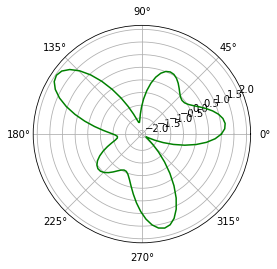

In [11]:
phi = np.linspace(0, 2 * np.pi, 100)
plt.figure()
plt.polar(phi, (np.sin(3*phi) + np.cos(5*phi)), color = 'g')
plt.show()

Построить 2 графика на одном изображении:
- на первом графике функции $y = x^2 + 3x - cos(x)$ и $y = exp(sin(x))$ для $x$ из отрезка $[0, pi/2]$. 
- на втором графике окружность радиуса 2 с центром в начале координат. 

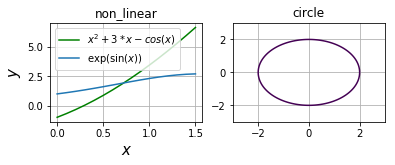

In [23]:
plt.figure(1)

x = np.arange(0, np.pi/2, 0.1)
y1 = x**2 + 3*x - np.cos(x)
y2 = np.exp(np.sin(x))

plt.subplot(221)
plt.plot(x, y1, color = 'g', label='$x^2 + 3*x - cos(x)$')
plt.plot(x, y2, label='$\exp(\sin(x))$')
plt.legend()  
plt.xlabel(r'$x$', fontsize=15)
plt.ylabel(r'$y$', fontsize=15)
plt.title(r'Title', fontsize=15)
plt.title('non_linear')
plt.grid(True)

plt.subplot(222)
x = np.linspace(-2.0, 2.0, 100)
y = np.linspace(-2.0, 2.0, 100)
X, Y = np.meshgrid(x,y)
F = X**2 + Y**2 - 4
plt.contour(X,Y,F,[0])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('circle')
plt.grid(True)

С помощью CatBoostClassifier добиться лучшего качества с помощью подбора параметров на кросс-валидации.

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',)
# Назначаем имена колонок
columns = ('age workclass fnlwgt education educ-num marital-status occupation relationship '
           'race sex capital-gain capital-loss  hours-per-week native-country salary')

numeric_indices = np.array([0, 2, 4, 10, 11, 12])
categorical_indices = ([1, 3, 5, 6, 7, 8, 9, 13])

df.columns = columns.split() #этот метод разделит датасет по колонкам как в массиве columns
df = df.dropna()


df_prc = df.copy()
df_prc['salary'] = df['salary'].apply((lambda x: x==' >50K')) # Будем предсказывать 1(True), если зарплата больше 50K, 0(False) иначе

In [6]:
X = np.array(df_prc[df._get_numeric_data().columns])
y = np.array(df_prc['salary'], dtype='int')

In [7]:
X = np.array(df_prc[df.columns[:-1]])

In [9]:
from sklearn.model_selection import train_test_split
X_train,  X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.2)

In [10]:
import catboost

In [11]:
from catboost import CatBoostClassifier

cat_features = categorical_indices

model = CatBoostClassifier(
    custom_loss=['Accuracy'],
    random_seed=42
)

model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation)
);

Learning rate set to 0.094993
0:	learn: 0.6062794	test: 0.6052205	best: 0.6052205 (0)	total: 172ms	remaining: 2m 52s
1:	learn: 0.5420315	test: 0.5380323	best: 0.5380323 (1)	total: 224ms	remaining: 1m 51s
2:	learn: 0.4965793	test: 0.4937199	best: 0.4937199 (2)	total: 339ms	remaining: 1m 52s
3:	learn: 0.4620938	test: 0.4597188	best: 0.4597188 (3)	total: 410ms	remaining: 1m 42s
4:	learn: 0.4408125	test: 0.4390929	best: 0.4390929 (4)	total: 473ms	remaining: 1m 34s
5:	learn: 0.4202585	test: 0.4183389	best: 0.4183389 (5)	total: 525ms	remaining: 1m 26s
6:	learn: 0.4025655	test: 0.4012134	best: 0.4012134 (6)	total: 576ms	remaining: 1m 21s
7:	learn: 0.3876880	test: 0.3874159	best: 0.3874159 (7)	total: 628ms	remaining: 1m 17s
8:	learn: 0.3718001	test: 0.3724670	best: 0.3724670 (8)	total: 696ms	remaining: 1m 16s
9:	learn: 0.3614395	test: 0.3628718	best: 0.3628718 (9)	total: 746ms	remaining: 1m 13s
10:	learn: 0.3532429	test: 0.3551745	best: 0.3551745 (10)	total: 795ms	remaining: 1m 11s
11:	learn: 

97:	learn: 0.2831032	test: 0.3016958	best: 0.3016958 (97)	total: 6.15s	remaining: 56.6s
98:	learn: 0.2830975	test: 0.3016959	best: 0.3016958 (97)	total: 6.18s	remaining: 56.3s
99:	learn: 0.2828579	test: 0.3015382	best: 0.3015382 (99)	total: 6.22s	remaining: 56s
100:	learn: 0.2818858	test: 0.3006710	best: 0.3006710 (100)	total: 6.35s	remaining: 56.5s
101:	learn: 0.2817560	test: 0.3006323	best: 0.3006323 (101)	total: 6.46s	remaining: 56.9s
102:	learn: 0.2816904	test: 0.3006543	best: 0.3006323 (101)	total: 6.55s	remaining: 57s
103:	learn: 0.2811175	test: 0.3004755	best: 0.3004755 (103)	total: 6.59s	remaining: 56.8s
104:	learn: 0.2807906	test: 0.3004634	best: 0.3004634 (104)	total: 6.64s	remaining: 56.6s
105:	learn: 0.2805282	test: 0.3003489	best: 0.3003489 (105)	total: 6.69s	remaining: 56.4s
106:	learn: 0.2801150	test: 0.3002371	best: 0.3002371 (106)	total: 6.73s	remaining: 56.2s
107:	learn: 0.2796197	test: 0.3001327	best: 0.3001327 (107)	total: 6.86s	remaining: 56.7s
108:	learn: 0.279582

190:	learn: 0.2589214	test: 0.2951876	best: 0.2951876 (190)	total: 12.1s	remaining: 51.2s
191:	learn: 0.2588892	test: 0.2951852	best: 0.2951852 (191)	total: 12.1s	remaining: 51.1s
192:	learn: 0.2588732	test: 0.2951955	best: 0.2951852 (191)	total: 12.2s	remaining: 51s
193:	learn: 0.2588564	test: 0.2951960	best: 0.2951852 (191)	total: 12.2s	remaining: 50.9s
194:	learn: 0.2588529	test: 0.2951977	best: 0.2951852 (191)	total: 12.4s	remaining: 51.1s
195:	learn: 0.2587091	test: 0.2950769	best: 0.2950769 (195)	total: 12.5s	remaining: 51.2s
196:	learn: 0.2586234	test: 0.2950689	best: 0.2950689 (196)	total: 12.6s	remaining: 51.2s
197:	learn: 0.2584682	test: 0.2950224	best: 0.2950224 (197)	total: 12.7s	remaining: 51.3s
198:	learn: 0.2583045	test: 0.2949777	best: 0.2949777 (198)	total: 12.8s	remaining: 51.4s
199:	learn: 0.2580617	test: 0.2950174	best: 0.2949777 (198)	total: 12.8s	remaining: 51.3s
200:	learn: 0.2578847	test: 0.2950194	best: 0.2949777 (198)	total: 12.9s	remaining: 51.5s
201:	learn: 

285:	learn: 0.2451248	test: 0.2920249	best: 0.2919894 (283)	total: 17.9s	remaining: 44.8s
286:	learn: 0.2447882	test: 0.2920328	best: 0.2919894 (283)	total: 18s	remaining: 44.7s
287:	learn: 0.2447713	test: 0.2920492	best: 0.2919894 (283)	total: 18s	remaining: 44.6s
288:	learn: 0.2447478	test: 0.2920833	best: 0.2919894 (283)	total: 18.1s	remaining: 44.5s
289:	learn: 0.2447131	test: 0.2920925	best: 0.2919894 (283)	total: 18.2s	remaining: 44.5s
290:	learn: 0.2446750	test: 0.2920674	best: 0.2919894 (283)	total: 18.2s	remaining: 44.4s
291:	learn: 0.2446472	test: 0.2921152	best: 0.2919894 (283)	total: 18.3s	remaining: 44.3s
292:	learn: 0.2444114	test: 0.2921694	best: 0.2919894 (283)	total: 18.3s	remaining: 44.2s
293:	learn: 0.2444083	test: 0.2921807	best: 0.2919894 (283)	total: 18.4s	remaining: 44.2s
294:	learn: 0.2443877	test: 0.2921594	best: 0.2919894 (283)	total: 18.5s	remaining: 44.1s
295:	learn: 0.2442193	test: 0.2918992	best: 0.2918992 (295)	total: 18.5s	remaining: 44s
296:	learn: 0.24

377:	learn: 0.2359853	test: 0.2913204	best: 0.2912359 (352)	total: 25.1s	remaining: 41.4s
378:	learn: 0.2358690	test: 0.2913250	best: 0.2912359 (352)	total: 25.2s	remaining: 41.3s
379:	learn: 0.2357244	test: 0.2913054	best: 0.2912359 (352)	total: 25.2s	remaining: 41.2s
380:	learn: 0.2354680	test: 0.2912863	best: 0.2912359 (352)	total: 25.3s	remaining: 41.1s
381:	learn: 0.2352571	test: 0.2913627	best: 0.2912359 (352)	total: 25.4s	remaining: 41.1s
382:	learn: 0.2351678	test: 0.2913187	best: 0.2912359 (352)	total: 25.4s	remaining: 41s
383:	learn: 0.2351603	test: 0.2913280	best: 0.2912359 (352)	total: 25.5s	remaining: 40.9s
384:	learn: 0.2351334	test: 0.2913326	best: 0.2912359 (352)	total: 25.6s	remaining: 40.8s
385:	learn: 0.2348255	test: 0.2912621	best: 0.2912359 (352)	total: 25.6s	remaining: 40.8s
386:	learn: 0.2348075	test: 0.2912777	best: 0.2912359 (352)	total: 25.8s	remaining: 40.9s
387:	learn: 0.2347799	test: 0.2912794	best: 0.2912359 (352)	total: 26s	remaining: 41s
388:	learn: 0.23

472:	learn: 0.2289794	test: 0.2910795	best: 0.2910657 (462)	total: 30.4s	remaining: 33.9s
473:	learn: 0.2289764	test: 0.2910795	best: 0.2910657 (462)	total: 30.5s	remaining: 33.8s
474:	learn: 0.2289762	test: 0.2910795	best: 0.2910657 (462)	total: 30.5s	remaining: 33.7s
475:	learn: 0.2287903	test: 0.2911093	best: 0.2910657 (462)	total: 30.6s	remaining: 33.7s
476:	learn: 0.2287420	test: 0.2910770	best: 0.2910657 (462)	total: 30.6s	remaining: 33.6s
477:	learn: 0.2286878	test: 0.2910860	best: 0.2910657 (462)	total: 30.7s	remaining: 33.5s
478:	learn: 0.2283185	test: 0.2905184	best: 0.2905184 (478)	total: 30.7s	remaining: 33.4s
479:	learn: 0.2282989	test: 0.2905297	best: 0.2905184 (478)	total: 30.8s	remaining: 33.3s
480:	learn: 0.2282988	test: 0.2905296	best: 0.2905184 (478)	total: 30.8s	remaining: 33.3s
481:	learn: 0.2282189	test: 0.2905176	best: 0.2905176 (481)	total: 30.9s	remaining: 33.2s
482:	learn: 0.2280343	test: 0.2905094	best: 0.2905094 (482)	total: 30.9s	remaining: 33.1s
483:	learn

566:	learn: 0.2246648	test: 0.2906288	best: 0.2905041 (484)	total: 34.9s	remaining: 26.7s
567:	learn: 0.2246214	test: 0.2906149	best: 0.2905041 (484)	total: 35s	remaining: 26.6s
568:	learn: 0.2246159	test: 0.2906168	best: 0.2905041 (484)	total: 35s	remaining: 26.5s
569:	learn: 0.2246096	test: 0.2906165	best: 0.2905041 (484)	total: 35.1s	remaining: 26.5s
570:	learn: 0.2245990	test: 0.2906126	best: 0.2905041 (484)	total: 35.1s	remaining: 26.4s
571:	learn: 0.2245937	test: 0.2906124	best: 0.2905041 (484)	total: 35.2s	remaining: 26.3s
572:	learn: 0.2245936	test: 0.2906125	best: 0.2905041 (484)	total: 35.2s	remaining: 26.2s
573:	learn: 0.2244876	test: 0.2906261	best: 0.2905041 (484)	total: 35.3s	remaining: 26.2s
574:	learn: 0.2244513	test: 0.2906152	best: 0.2905041 (484)	total: 35.3s	remaining: 26.1s
575:	learn: 0.2244512	test: 0.2906151	best: 0.2905041 (484)	total: 35.3s	remaining: 26s
576:	learn: 0.2243456	test: 0.2906328	best: 0.2905041 (484)	total: 35.4s	remaining: 25.9s
577:	learn: 0.22

661:	learn: 0.2201730	test: 0.2906986	best: 0.2904244 (581)	total: 39.7s	remaining: 20.3s
662:	learn: 0.2199259	test: 0.2907355	best: 0.2904244 (581)	total: 39.8s	remaining: 20.2s
663:	learn: 0.2199104	test: 0.2907317	best: 0.2904244 (581)	total: 39.8s	remaining: 20.1s
664:	learn: 0.2198158	test: 0.2907521	best: 0.2904244 (581)	total: 39.9s	remaining: 20.1s
665:	learn: 0.2194614	test: 0.2908546	best: 0.2904244 (581)	total: 39.9s	remaining: 20s
666:	learn: 0.2193366	test: 0.2908548	best: 0.2904244 (581)	total: 40s	remaining: 20s
667:	learn: 0.2192961	test: 0.2908714	best: 0.2904244 (581)	total: 40s	remaining: 19.9s
668:	learn: 0.2192015	test: 0.2908847	best: 0.2904244 (581)	total: 40.1s	remaining: 19.8s
669:	learn: 0.2191612	test: 0.2908755	best: 0.2904244 (581)	total: 40.1s	remaining: 19.8s
670:	learn: 0.2191411	test: 0.2908626	best: 0.2904244 (581)	total: 40.2s	remaining: 19.7s
671:	learn: 0.2191056	test: 0.2908428	best: 0.2904244 (581)	total: 40.2s	remaining: 19.6s
672:	learn: 0.2190

755:	learn: 0.2145661	test: 0.2914481	best: 0.2904244 (581)	total: 44.8s	remaining: 14.4s
756:	learn: 0.2145660	test: 0.2914481	best: 0.2904244 (581)	total: 44.8s	remaining: 14.4s
757:	learn: 0.2145142	test: 0.2914562	best: 0.2904244 (581)	total: 44.9s	remaining: 14.3s
758:	learn: 0.2144694	test: 0.2914579	best: 0.2904244 (581)	total: 44.9s	remaining: 14.3s
759:	learn: 0.2143437	test: 0.2914559	best: 0.2904244 (581)	total: 45s	remaining: 14.2s
760:	learn: 0.2143091	test: 0.2914449	best: 0.2904244 (581)	total: 45s	remaining: 14.1s
761:	learn: 0.2142691	test: 0.2914374	best: 0.2904244 (581)	total: 45.1s	remaining: 14.1s
762:	learn: 0.2140512	test: 0.2914619	best: 0.2904244 (581)	total: 45.1s	remaining: 14s
763:	learn: 0.2140435	test: 0.2914805	best: 0.2904244 (581)	total: 45.2s	remaining: 14s
764:	learn: 0.2139625	test: 0.2914386	best: 0.2904244 (581)	total: 45.3s	remaining: 13.9s
765:	learn: 0.2138996	test: 0.2914335	best: 0.2904244 (581)	total: 45.3s	remaining: 13.8s
766:	learn: 0.2138

849:	learn: 0.2107617	test: 0.2913684	best: 0.2904244 (581)	total: 49.5s	remaining: 8.74s
850:	learn: 0.2106937	test: 0.2913583	best: 0.2904244 (581)	total: 49.6s	remaining: 8.68s
851:	learn: 0.2106867	test: 0.2913645	best: 0.2904244 (581)	total: 49.7s	remaining: 8.63s
852:	learn: 0.2106722	test: 0.2913544	best: 0.2904244 (581)	total: 49.7s	remaining: 8.57s
853:	learn: 0.2104882	test: 0.2914490	best: 0.2904244 (581)	total: 49.8s	remaining: 8.51s
854:	learn: 0.2103799	test: 0.2914520	best: 0.2904244 (581)	total: 49.8s	remaining: 8.45s
855:	learn: 0.2103765	test: 0.2914518	best: 0.2904244 (581)	total: 49.9s	remaining: 8.39s
856:	learn: 0.2103345	test: 0.2914595	best: 0.2904244 (581)	total: 49.9s	remaining: 8.33s
857:	learn: 0.2103218	test: 0.2914630	best: 0.2904244 (581)	total: 50s	remaining: 8.27s
858:	learn: 0.2102654	test: 0.2914651	best: 0.2904244 (581)	total: 50s	remaining: 8.21s
859:	learn: 0.2102639	test: 0.2914659	best: 0.2904244 (581)	total: 50.1s	remaining: 8.15s
860:	learn: 0.

942:	learn: 0.2073340	test: 0.2919727	best: 0.2904244 (581)	total: 54.5s	remaining: 3.29s
943:	learn: 0.2072872	test: 0.2919766	best: 0.2904244 (581)	total: 54.6s	remaining: 3.24s
944:	learn: 0.2072773	test: 0.2919543	best: 0.2904244 (581)	total: 54.6s	remaining: 3.18s
945:	learn: 0.2072306	test: 0.2919312	best: 0.2904244 (581)	total: 54.7s	remaining: 3.12s
946:	learn: 0.2072273	test: 0.2919210	best: 0.2904244 (581)	total: 54.7s	remaining: 3.06s
947:	learn: 0.2072195	test: 0.2919194	best: 0.2904244 (581)	total: 54.8s	remaining: 3s
948:	learn: 0.2072193	test: 0.2919194	best: 0.2904244 (581)	total: 54.8s	remaining: 2.95s
949:	learn: 0.2071723	test: 0.2919418	best: 0.2904244 (581)	total: 54.9s	remaining: 2.89s
950:	learn: 0.2071391	test: 0.2919620	best: 0.2904244 (581)	total: 54.9s	remaining: 2.83s
951:	learn: 0.2070842	test: 0.2919694	best: 0.2904244 (581)	total: 55s	remaining: 2.77s
952:	learn: 0.2070837	test: 0.2919692	best: 0.2904244 (581)	total: 55.1s	remaining: 2.71s
953:	learn: 0.2

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

params = {"iterations": range(91,500, 100),
          "depth": range(1,5),
          "od_wait": range(1,2)}

model_grid = GridSearchCV(model, params, cv=5, scoring='accuracy')

model_grid.fit(X_train, y_train, cat_features=cat_features)

CatBoostError: Invalid cat_features[7] = 13 value: must be < 13.

In [13]:
model_grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
model_grid.best_score_

Обучить линейную модель с L1 регуляризацией. Коэффициент регуляризации подобрать по кросс валидации. Метрика качества -- MSE. 

In [14]:
from sklearn.datasets import load_boston

In [15]:
boston = load_boston()

In [16]:
X = boston['data']
y = boston['target']
columns = boston['feature_names'].tolist() + ['target']

df = pd.DataFrame(data=np.hstack((X, y[:, None])), columns=columns)

In [17]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [18]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [21]:
lasso_regressor = Lasso()
lasso_regressor.fit(X_train, y_train)

gs = GridSearchCV(lasso_regressor, {'alpha' : [0.00001, 2, 0.001]}, scoring = 'neg_mean_squared_error', cv = 5)
gs.fit(X_train, y_train)
print("Наилучший коэффициент регуляризации", gs.best_params_)

Наилучший коэффициент регуляризации {'alpha': 0.001}


/Users/yan1/PRO/environments/py3mfti/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Функция, которая принимает на вход непустую последовательность чисел и считает среднее методом экспоненциального сглаживания. Протестирована на нескольких наборах данных (сгенерированы самостоятельно) - проведено сравнение с истинным средним

In [23]:
def smoothing(arr, alpha=0.1):
    all_mean = [arr[0]]
    for t in range(1, len(arr)):
        t_mean = alpha * arr[t] + (1 - alpha) * all_mean[t-1]
        all_mean.append(t_mean)
    return all_mean[-1]

In [24]:
p = np.random.randn(100000)
print('Сглаженное среднее ', smoothing(p))
print('Истинное среднее ', np.mean(p))

Сглаженное среднее  -0.01541818687182775
Истинное среднее  0.0024172036369548735


In [25]:
p = np.linspace(0, 2000000, 400)
print('Сглаженное среднее ', smoothing(p))
print('Истинное среднее ', np.mean(p))

Сглаженное среднее  1954887.218045114
Истинное среднее  1000000.0000000001


Искусственным образом сгенерирован случайный процесс, к нему добавлен тренд и сезонность. Применено дифференцирование, чтобы избавиться от них.

In [26]:
import statsmodels.api as sms

def laplace_motion(n, dt=0.1, sigma=1):
    motion = [0,]
    for i in range(n):
        motion.append(motion[-1] + np.random.laplace() * np.sqrt(dt) * sigma)
    return np.array(motion)

In [27]:
data_laplace = laplace_motion(1000)

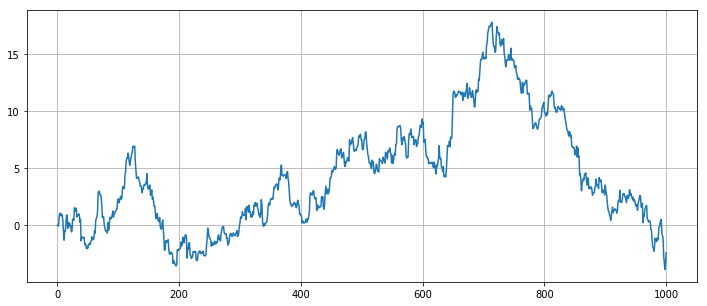

In [28]:
plt.figure(figsize=(12,5))
plt.plot(data_laplace)
plt.grid()
plt.show()

In [29]:
d = np.diff(data_laplace)

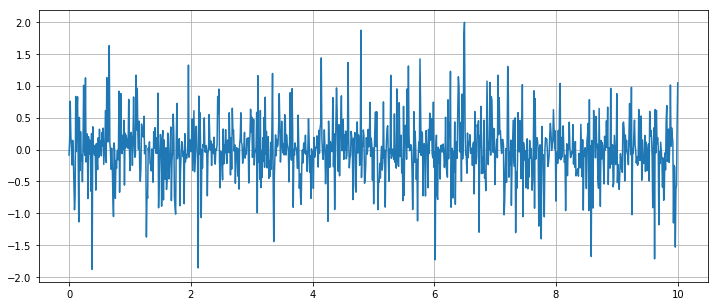

In [30]:
grid = np.linspace(0, 10, 1000)

plt.figure(figsize=(12,5))
plt.plot(grid, d)
plt.grid()
plt.show()

In [31]:
dd= d[250:] - d[:-250] 

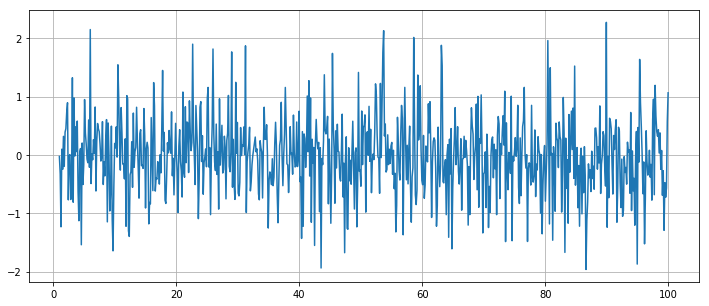

In [32]:
plt.figure(figsize=(12,5))
plt.plot(np.linspace(1, 100, len(dd)), dd)
plt.grid()
plt.show()

В предоставленных данных избавиться от тренда и сезонности. Для этого необходимо правильно определить период сезонности. Сделан вывод по  полученным остаткам.

In [11]:
data = np.loadtxt('./resources/hw_data.txt')

In [ ]:
data_acf = sms.tsa.acf(data, nlags=len(data), fft=False)

In [ ]:
plot(data_acf[:30])

In [ ]:
d = np.diff(data)

In [ ]:
grid = np.linspace(0, 10, 1000)

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(grid[:-1], d)
plt.grid()
plt.show()

In [ ]:
dd = data[8:] - data[:-8] 

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(grid[:-8], dd)
plt.grid()
plt.show()

In [ ]:
data_residual = STL(dd, period=8).fit().resid

In [ ]:
plot(sms.tsa.acf(data_residual, nlags=50))

In [ ]:
sms.tsa.stattools.kpss(data_residual) # гипотезу о стационарности ряда не отвергаем

In [ ]:
sms.tsa.acf(data_residual, nlags=len(data), fft=False, qstat=True) # гипотеза "о белом шуме" отвергается